In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('reliance_data.csv')

In [ ]:
df.head()

,timestamp,open,high,low,close,volume
0,2025-05-09,1372.05,1395.00,1372.05,1377.75,388444
1,2025-05-08,1404.95,1420.50,1397.05,1404.85,573809
2,2025-05-07,1412.05,1424.90,1402.15,1406.00,262093
3,2025-05-06,1432.00,1432.00,1410.35,1420.55,311563
4,2025-05-05,1427.00,1439.75,1427.00,1431.10,428786


In [ ]:
df['EMA_20'] = df['close'].ewm(span = 20 , adjust =False).mean()

def compute_rsi(series, period = 14):
  delta = series.diff()
  gain = (delta.where(delta>0,0)).rolling(window = period).mean()
  loss = (-delta.where(delta < 0,0)).rolling(window = period).mean()
  rs = gain/loss

  return 100 - (100/(1 + rs))

df['RSI'] = compute_rsi(df['close'])

sma_20= df['close'].rolling(window = 20).mean()
std_20 =df['close'].rolling(window = 20).std()

df['BB_upper'] = sma_20 + 2*std_20
df['BB_Lower'] = sma_20 - 2* std_20

In [ ]:
df.head()

,timestamp,open,high,low,close,volume,EMA_20,RSI,BB_upper,BB_Lower
0,2025-05-09,1372.05,1395.00,1372.05,1377.75,388444,1377.750000,NaN,NaN,NaN
1,2025-05-08,1404.95,1420.50,1397.05,1404.85,573809,1380.330952,NaN,NaN,NaN
2,2025-05-07,1412.05,1424.90,1402.15,1406.00,262093,1382.775624,NaN,NaN,NaN
3,2025-05-06,1432.00,1432.00,1410.35,1420.55,311563,1386.373183,NaN,NaN,NaN
4,2025-05-05,1427.00,1439.75,1427.00,1431.10,428786,1390.632880,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

,0
timestamp,0
open,0
high,0
low,0
close,0
volume,0
EMA_20,0
RSI,13
BB_upper,19
BB_Lower,19


In [ ]:
df = df.dropna()
df.isnull().sum()

,0
timestamp,0
open,0
high,0
low,0
close,0
volume,0
EMA_20,0
RSI,0
BB_upper,0
BB_Lower,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4993 entries, 19 to 5011
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  4993 non-null   object 
 1   open       4993 non-null   float64
 2   high       4993 non-null   float64
 3   low        4993 non-null   float64
 4   close      4993 non-null   float64
 5   volume     4993 non-null   int64  
 6   EMA_20     4993 non-null   float64
 7   RSI        4993 non-null   float64
 8   BB_upper   4993 non-null   float64
 9   BB_Lower   4993 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 429.1+ KB


In [ ]:
df.describe()

,open,high,low,close,volume,EMA_20,RSI,BB_upper,BB_Lower
count,4993.000000,4993.000000,4993.000000,4993.000000,4.993000e+03,4993.000000,4993.000000,4993.000000,4993.000000
mean,1321.621325,1338.066394,1304.605793,1320.799174,5.657856e+06,1322.597583,47.585379,1415.090921,1230.062158
std,658.643518,666.405015,650.934019,658.634499,4.022053e+07,651.194923,17.130848,704.647255,619.968879
min,344.152800,347.798800,339.518200,341.699200,8.174800e+04,356.129623,0.950909,371.870664,296.438998
25%,835.955000,844.980000,825.927200,834.268600,7.713940e+05,840.766409,34.935735,886.359124,777.208327
50%,1027.076000,1042.619200,1009.162600,1026.301200,1.585770e+06,1051.256412,47.673214,1154.077882,949.917188
75%,1846.348200,1878.438000,1817.313900,1847.442900,4.695977e+06,1842.224931,59.958345,2011.581511,1709.261062
max,3200.150000,3217.900000,3171.000000,3202.100000,1.604368e+09,3108.689183,97.533012,3966.625901,2975.439082


In [ ]:
import matplotlib.pyplot as plt
df = df[::-1]

df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp')

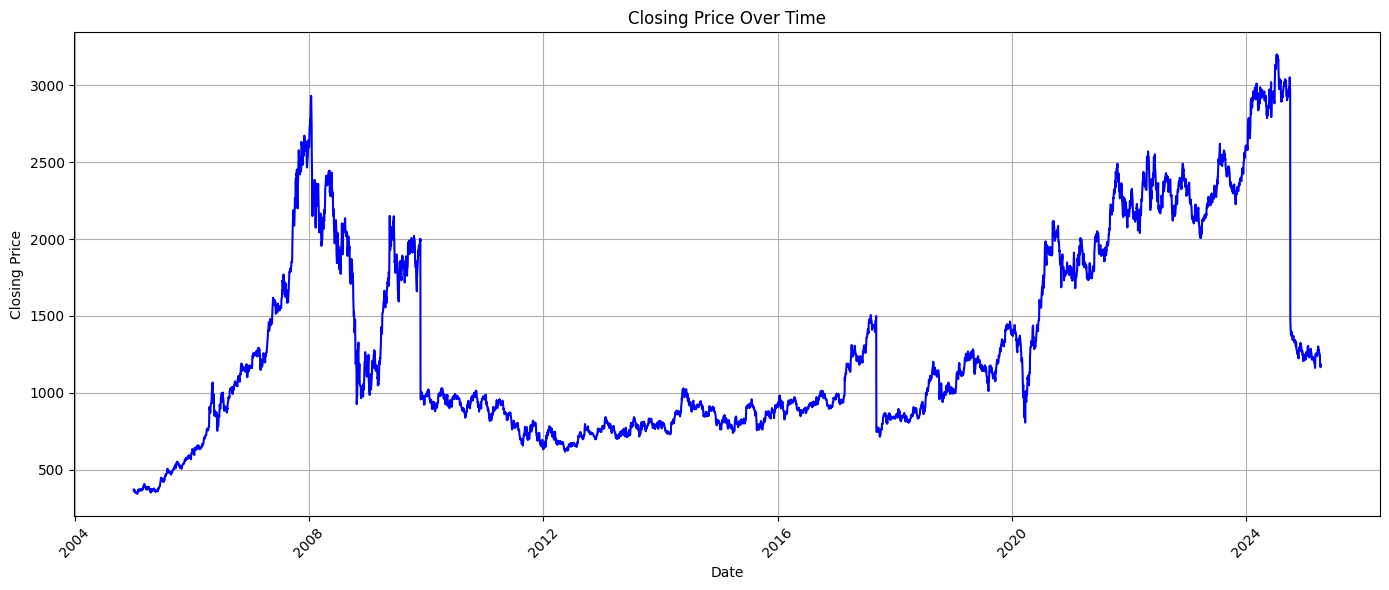

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(df['timestamp'], df['close'], color='blue', linewidth=1.5)  # Removed marker, increased line width
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

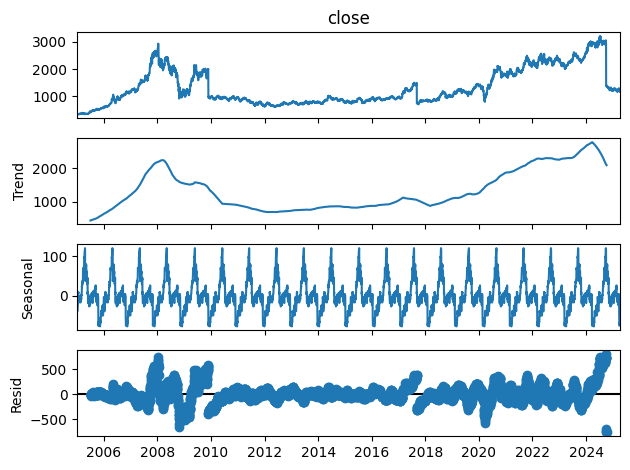

In [ ]:
df.set_index('timestamp', inplace=True)
decomposition = seasonal_decompose(df['close'], model='additive', period=252)

decomposition.plot()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
y = df['close']

X_scaled =scaler.fit_transform(df)
target_index = df.columns.get_loc('close')
target = X_scaled[:,target_index]
X_scaled,target

(array([[3.59110996e-03, 8.10856426e-03, 5.25901314e-03, ...,
         7.63904508e-01, 3.36296576e-04, 1.56793480e-02],
        [7.15848041e-03, 8.21552912e-03, 7.53344062e-03, ...,
         7.35701449e-01, 0.00000000e+00, 1.58952957e-02],
        [4.89160143e-03, 5.61548143e-03, 4.34443901e-03, ...,
         6.81391920e-01, 3.32446761e-04, 1.57112252e-02],
        ...,
        [3.13672296e-01, 3.12672320e-01, 3.01372871e-01, ...,
         1.56370016e-01, 3.08852311e-01, 3.08729694e-01],
        [2.73406150e-01, 2.86819573e-01, 2.74072678e-01, ...,
         2.12984386e-02, 3.11436348e-01, 3.12733434e-01],
        [2.91911071e-01, 2.95808803e-01, 2.91130884e-01, ...,
         2.16159233e-02, 3.11067078e-01, 3.21125533e-01]]),
 array([0.00993504, 0.00700447, 0.00679003, ..., 0.30170625, 0.2882466 ,
        0.29391014]))

In [ ]:
n = int(len(X_scaled)*0.90)
X_train = X_scaled[:n]
X_test = X_scaled[n:]
y_train = target[:n]
y_test = target[n:]

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

sequence_length = 60
batch_size =32

generator = TimeseriesGenerator(X_train,y_train,length = sequence_length, batch_size = batch_size)

In [ ]:
X,y = generator[0]
print(X.flatten())
print(y)
print(X.shape)

[0.00359111 0.00810856 0.00525901 ... 0.55445799 0.00265657 0.01999265]
[0.01061411 0.01500978 0.01508117 0.01292504 0.01653454 0.01525989
 0.0132824  0.01091183 0.01123339 0.01049496 0.00674248 0.0040265
 0.00302573 0.00686163 0.00976821 0.01076898 0.01075695 0.01091183
 0.00898203 0.00982778 0.00626604 0.00775514 0.00936316 0.00943476
 0.00935135 0.01129296 0.01240092 0.0101018  0.00976821 0.00895819
 0.00829115 0.00924402]
(32, 60, 9)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

num_features = X_train.shape[1]
model = Sequential([
    LSTM(128, activation='relu',return_sequences = True, input_shape=(sequence_length,num_features)),
    LSTM(64,activation='relu'),
    Dense(1)
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 60, 128)        │        70,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,129 (469.25 KB)

 Trainable params: 120,129 (469.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam',loss ='mse')

In [ ]:
model.fit(generator,epochs=100)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


139/139 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - loss: 0.0129
Epoch 2/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 6.1405e-04
Epoch 3/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 3.8192e-04
Epoch 4/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 6.7023e-04
Epoch 5/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 6.3742e-04
Epoch 6/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.2622e-04
Epoch 7/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.6359e-04
Epoch 8/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.3608e-04
Epoch 9/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.7446e-04
Epoch 10/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 3.3220e-04
Epoch 11/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 4.1788e-04
Epoch 12/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.8990e-04
Epoch 13/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 3.6849e-04
Epoch 14/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 

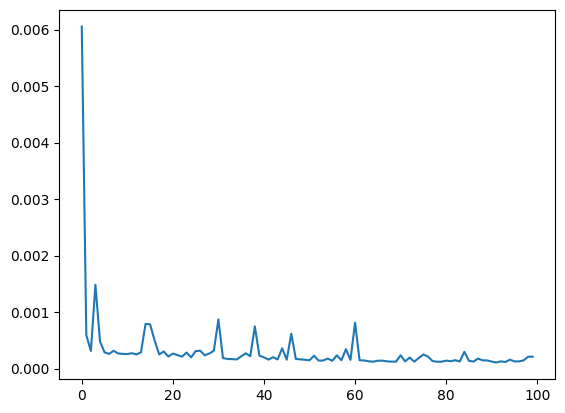

In [ ]:
loss_per_epoch=model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
test_gen = TimeseriesGenerator(X_test,y_test,length = sequence_length, batch_size =1)

y_pred = model.predict(test_gen)
y_true = np.array([X_test[i+sequence_length][target_index] for i in range(len(X_test)-sequence_length)])

dummy_array = np.zeros((len(y_pred),X_test.shape[1]))
dummy_array[:,target_index] = y_pred.flatten()

y_pred = scaler.inverse_transform(dummy_array)[:,target_index]

dummy_array[:,target_index]=y_true

y_true = scaler.inverse_transform(dummy_array)[:,target_index]

440/440 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

mse=mean_squared_error(y_true,y_pred)
mae=mean_absolute_error(y_true,y_pred)
r2= r2_score(y_true,y_pred)

print(f"r2_score = {r2}")

r2_score = 0.9864418072657185


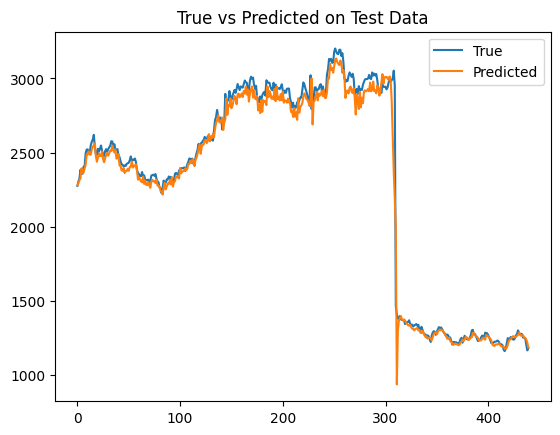

In [ ]:
import matplotlib.pyplot as plt

plt.plot(y_true, label='True')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title("True vs Predicted on Test Data")
plt.show()